# <b><font color='#fc0808'>Did Jürgen Klopp revitalized Liverpool's performance in EPL?</font></b>
![Alt Text](https://www.si.com/.image/t_share/MTY5NzY2MjE4ODI2MjYxNjY1/klopp.jpg)

## Exploratory Data Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
url = 'https://raw.githubusercontent.com/Radosvet7/EPL_LIV/main/results.csv'
df = pd.read_csv(url, encoding='windows-1252')
df.head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-94,1993-08-14T00:00:00Z,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-94,1993-08-14T00:00:00Z,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-94,1993-08-14T00:00:00Z,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-94,1993-08-14T00:00:00Z,Southampton,Everton,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-94,1993-08-14T00:00:00Z,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [4]:
#derive general statistics to take a look of each numeric column patterns
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,11113.000000,11113.000000,10189.000000,10189.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.518222,1.141456,0.684758,0.501031,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.301981,1.135907,0.836299,0.722299,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


### Finding missing values

In [5]:
for col in df.columns:
    if df[col].isna().any():
        null_rate = df[col].isna().sum() / len(df[col])
        print(f'{col} null rate: {null_rate:.4f}')

HTHG null rate: 0.0831
HTAG null rate: 0.0831
HTR null rate: 0.0831
Referee null rate: 0.2541
HS null rate: 0.2541
AS null rate: 0.2541
HST null rate: 0.2541
AST null rate: 0.2541
HC null rate: 0.2541
AC null rate: 0.2541
HF null rate: 0.2541
AF null rate: 0.2541
HY null rate: 0.2541
AY null rate: 0.2541
HR null rate: 0.2541
AR null rate: 0.2541


### Removing the missing data and duplicates from the original dataset

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head(10)
# Okay, it sees like we are left to work with the new millennium data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
2829,2000-01,2000-08-19T00:00:00Z,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,4.0,3.0,5.0,4.0,12.0,12.0,2.0,3.0,0.0,0.0
2830,2000-01,2000-08-19T00:00:00Z,Liverpool,Bradford,1,0,H,0.0,0.0,D,...,10.0,2.0,6.0,1.0,8.0,8.0,1.0,1.0,0.0,0.0
2831,2000-01,2000-08-19T00:00:00Z,Sunderland,Arsenal,1,0,H,0.0,0.0,D,...,2.0,7.0,2.0,9.0,10.0,21.0,3.0,1.0,0.0,1.0
2832,2000-01,2000-08-19T00:00:00Z,Tottenham,Ipswich,3,1,H,2.0,1.0,H,...,6.0,5.0,3.0,4.0,14.0,13.0,0.0,0.0,0.0,0.0
2833,2000-01,2000-08-20T00:00:00Z,Man United,Newcastle,2,0,H,1.0,0.0,H,...,9.0,6.0,7.0,1.0,7.0,13.0,0.0,1.0,0.0,0.0


### Reformatting Season and DateTime columns

In [7]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Season']=df['Season'].apply(lambda x: x[2:4] + '-' + x[-2:])
df.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,00-01,2000-08-19 00:00:00+00:00,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,00-01,2000-08-19 00:00:00+00:00,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,00-01,2000-08-19 00:00:00+00:00,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,00-01,2000-08-19 00:00:00+00:00,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,00-01,2000-08-19 00:00:00+00:00,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
2829,00-01,2000-08-19 00:00:00+00:00,Leicester,Aston Villa,0,0,D,0.0,0.0,D,...,4.0,3.0,5.0,4.0,12.0,12.0,2.0,3.0,0.0,0.0
2830,00-01,2000-08-19 00:00:00+00:00,Liverpool,Bradford,1,0,H,0.0,0.0,D,...,10.0,2.0,6.0,1.0,8.0,8.0,1.0,1.0,0.0,0.0
2831,00-01,2000-08-19 00:00:00+00:00,Sunderland,Arsenal,1,0,H,0.0,0.0,D,...,2.0,7.0,2.0,9.0,10.0,21.0,3.0,1.0,0.0,1.0
2832,00-01,2000-08-19 00:00:00+00:00,Tottenham,Ipswich,3,1,H,2.0,1.0,H,...,6.0,5.0,3.0,4.0,14.0,13.0,0.0,0.0,0.0,0.0
2833,00-01,2000-08-20 00:00:00+00:00,Man United,Newcastle,2,0,H,1.0,0.0,H,...,9.0,6.0,7.0,1.0,7.0,13.0,0.0,1.0,0.0,0.0


### Dropping unwanted columns

In [8]:
df.drop(['Referee', 'HTR', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)

### W/D/L% Ratio and point-wise comparison 

In [9]:
#we have to create points column in our new 'df_compare_period' dataset that contains only Liverpool data

df_compare_period = pd.concat([df[df['HomeTeam']=='Liverpool'], df[df['AwayTeam']=="Liverpool"]]).sort_index()
df_compare_period['Pts'] = 0

df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool')&(df_compare_period['FTR']=='H'), 'Pts'] = 3
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool')&(df_compare_period['FTR']=='D'), 'Pts'] = 1
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool')&(df_compare_period['FTR']=='A'), 'Pts'] = 3
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool')&(df_compare_period['FTR']=='D'), 'Pts'] = 1

df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool')&(df_compare_period['FTR']=='H'), 'W'] = 1
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool')&(df_compare_period['FTR']=='D'), 'D'] = 1
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool')&(df_compare_period['FTR']=='A'), 'L'] = 1
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool')&(df_compare_period['FTR']=='H'), 'L'] = 1
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool')&(df_compare_period['FTR']=='D'), 'D'] = 1
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool')&(df_compare_period['FTR']=='A'), 'W'] = 1

In [10]:
# we will have to create 2 additional columns:
# 1. for manager reign
# 2. for before/during Klopp period

conditions = [(df_compare_period['DateTime']<= '2004-05-24'),
              (df_compare_period['DateTime']>='2004-06-16') & (df_compare_period['DateTime']<='2010-06-03'),
              (df_compare_period['DateTime']>='2010-07-01') & (df_compare_period['DateTime']<='2011-01-08'),
              (df_compare_period['DateTime']>='2011-01-09') & (df_compare_period['DateTime']<='2012-05-16'),
              (df_compare_period['DateTime']>='2012-06-01') & (df_compare_period['DateTime']<='2015-10-04'),
              (df_compare_period['DateTime']>='2015-10-05')]
values = ['Gérard Houllier', 'Rafael Benítez','Roy Hodgson', 'Kenny Dalglish', 'Brendan Rodgers', 'Jürgen Klopp']
df_compare_period['Manager'] = np.select(conditions, values)

df_compare_period.loc[df_compare_period['DateTime'] <  '2015-10-05', 'before_after_era'] = 'before Klopp'
df_compare_period.loc[df_compare_period['DateTime'] >= '2015-10-05', 'before_after_era'] = 'during Klopp'
df_compare_period.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HY,AY,HR,AR,Pts,W,D,L,Manager,before_after_era
2830,00-01,2000-08-19 00:00:00+00:00,Liverpool,Bradford,1,0,H,0.0,0.0,16.0,...,1.0,1.0,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp
2834,00-01,2000-08-21 00:00:00+00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,17.0,...,2.0,4.0,1.0,2.0,0,NaN,NaN,1.0,Gérard Houllier,before Klopp
2850,00-01,2000-08-26 00:00:00+00:00,Southampton,Liverpool,3,3,D,0.0,1.0,14.0,...,0.0,0.0,0.0,0.0,1,NaN,1.0,NaN,Gérard Houllier,before Klopp
2862,00-01,2000-09-06 00:00:00+00:00,Liverpool,Aston Villa,3,1,H,3.0,0.0,11.0,...,0.0,2.0,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp
2867,00-01,2000-09-09 00:00:00+00:00,Liverpool,Man City,3,2,H,1.0,0.0,14.0,...,3.0,4.0,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp


##### Before and during era points comparison

In [11]:
#ok, now that we have our categories, lets compare see what our stats show us 
#Starting with average points per game metrics
result = df_compare_period.groupby(['before_after_era']).agg (
                                                    pts = ('Pts', 'sum'),
                                                    cnt = ('Pts', 'count') )
result['ppg'] = result['pts'] / result['cnt']
result = result.drop(columns=['pts'])
result

,cnt,ppg
before_after_era,,
before Klopp,578,1.790657
during Klopp,251,2.139442


In [12]:
wdl_ratio = df_compare_period.groupby(by='before_after_era')[['W', 'D', 'L']].sum()
wdl_ratio['W_ratio'] = wdl_ratio['W'] / wdl_ratio.sum(axis=1)
wdl_ratio['D_ratio'] = wdl_ratio['D'] / wdl_ratio.sum(axis=1)
wdl_ratio['L_ratio'] = wdl_ratio['L'] / wdl_ratio.sum(axis=1)
wdl_ratio.drop(columns=['W', 'D', 'L'], inplace=True)
wdl_ratio = wdl_ratio.sort_values(by='W_ratio', ascending=False)
wdl_ratio

,W_ratio,D_ratio,L_ratio
before_after_era,,,
during Klopp,0.637450,0.226516,0.134994
before Klopp,0.515571,0.243727,0.240169


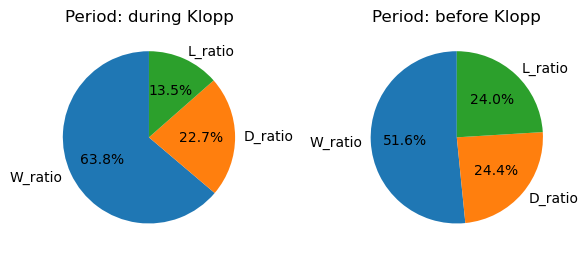

In [13]:
unique_values = wdl_ratio.index.unique()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for i, value in enumerate(unique_values):
    data = wdl_ratio.loc[value]
    
    axes[i].pie(data[['W_ratio', 'D_ratio', 'L_ratio']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Period: {value}')

plt.tight_layout()
plt.show()

##### Summary:

Seems like Klopp really lifts Liverpool's performance <u>winning 0.4 more points per game on average in Premier League compared to previous period</u>. Also, now we clearly see why people tend to believe that Klopp is bringing the old glory to the club. <b>He is winning 63.7% of the matches</b>, while the club
only won <u>51.5% of it's matches in the period before Klopps reign</u>.

#### Detailed manager comparison by points

In [14]:
result_manager = df_compare_period.groupby(['Manager']).agg (
                                                    pts = ('Pts', 'sum'),
                                                    cnt = ('Pts', 'count') )
result_manager['ppg'] = result_manager['pts'] / result_manager['cnt']
result_manager = result_manager.drop(columns=['pts'])
result_manager = result_manager.sort_values(by='ppg', ascending=False)
result_manager

,cnt,ppg
Manager,,
Jürgen Klopp,251,2.139442
Rafael Benítez,228,1.899123
Gérard Houllier,152,1.796053
Brendan Rodgers,122,1.795082
Kenny Dalglish,56,1.517857
Roy Hodgson,20,1.250000


In [15]:
wdl_ratio_manager = df_compare_period.groupby(by='Manager')[['W', 'D', 'L']].sum()
wdl_ratio_manager['W_ratio'] = wdl_ratio_manager['W'] / wdl_ratio_manager.sum(axis=1)
wdl_ratio_manager['D_ratio'] = wdl_ratio_manager['D'] / wdl_ratio_manager.sum(axis=1)
wdl_ratio_manager['L_ratio'] = wdl_ratio_manager['L'] / wdl_ratio_manager.sum(axis=1)
wdl_ratio_manager.drop(columns=['W', 'D', 'L'], inplace=True)
wdl_ratio_manager = wdl_ratio_manager.sort_values(by='W_ratio', ascending=False)
wdl_ratio_manager

,W_ratio,D_ratio,L_ratio
Manager,,,
Jürgen Klopp,0.637450,0.226516,0.134994
Rafael Benítez,0.552632,0.240645,0.205426
Brendan Rodgers,0.516393,0.244865,0.236231
Gérard Houllier,0.513158,0.255716,0.229104
Kenny Dalglish,0.428571,0.230380,0.335340
Roy Hodgson,0.350000,0.196560,0.438030


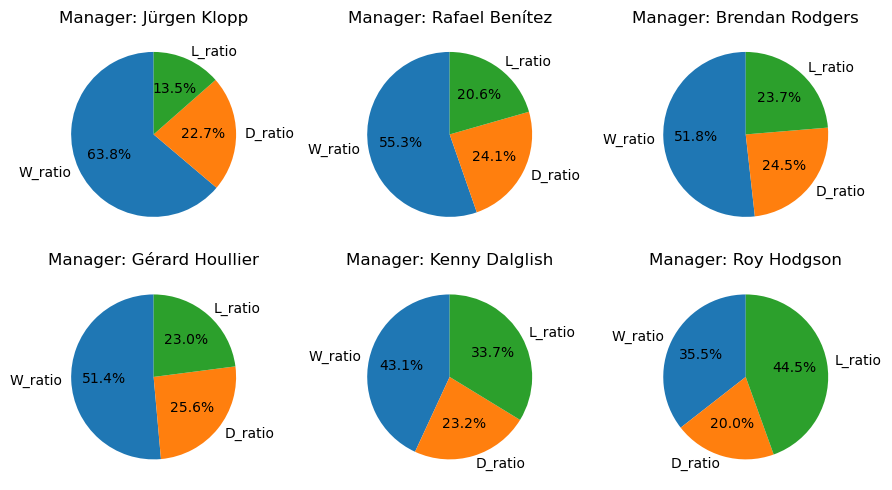

In [16]:
unique_values = wdl_ratio_manager.index.unique()

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

# Iterate through unique values and plot each group
for i, value in enumerate(unique_values):
    row, col = divmod(i, 3)  # Calculate the row and column indices
    data = wdl_ratio_manager.loc[value]
    
    # Pie chart for each group
    axes[row, col].pie(data[['W_ratio', 'D_ratio', 'L_ratio']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Manager: {value}')

plt.tight_layout()
plt.show()


##### Summary:

Again, none of the previous managers comes even close to his w/d/l ratio stats. <b>Losing only 13.5%</b> of his total matches in Premier league. Terrific performance!

#### Detailed manager comparison by points and season

In [17]:
ppg_season = df_compare_period.groupby(['Season', 'Manager']).agg( pts = ('Pts', 'sum'),
                                                                  cnt= ('Pts', 'count'))
ppg_season['average_points'] = ppg_season['pts'] / ppg_season['cnt']
ppg_season['manager_season'] = ppg_season.apply(lambda row: f"{row.name[1]} ({row.name[0]})", axis=1)

ppg_season = ppg_season.sort_values(by='average_points', ascending=False)
ppg_season.reset_index(drop=True, inplace=True)
ppg_season = ppg_season[['manager_season', 'average_points']]
ppg_season

,manager_season,average_points
0,Jürgen Klopp (19-20),2.605263
1,Jürgen Klopp (18-19),2.552632
2,Jürgen Klopp (21-22),2.354839
3,Rafael Benítez (08-09),2.263158
4,Brendan Rodgers (13-14),2.210526
5,Rafael Benítez (05-06),2.157895
6,Gérard Houllier (01-02),2.105263
7,Rafael Benítez (07-08),2.000000
8,Jürgen Klopp (16-17),2.000000
9,Jürgen Klopp (17-18),1.973684


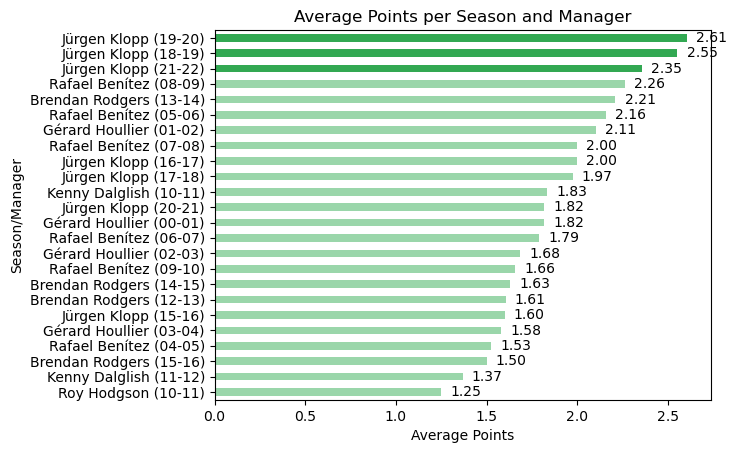

In [18]:
top3_mask = ppg_season.index < 3
color_map = ['#32a852' if top3 else '#9ad6aa' for top3 in top3_mask]

ax = ppg_season.plot.barh(y='average_points', x='manager_season', color=color_map, legend=False)
plt.xlabel('Average Points')
plt.ylabel('Season/Manager')
plt.title('Average Points per Season and Manager')
plt.gca().invert_yaxis()
for i, v in enumerate(ppg_season['average_points']):
    ax.text(v + 0.05, i, f'{v:.2f}', color='black', va='center')
plt.show()

##### Summary:

<b>Klopp is occupying the top 3 best Liverpool seasons pointwise</b> in the new milennial. Not only that, <u>but his 5 of his 6 seasons in charge of Liverpool are found in top 10 best seasons for the club</u>.  

### Total Goals comparison section

In [19]:
#I now want to create new variables tracking goals for and shot against liverpool so i can compare the style of play of Liverpool under Klopp and before that

df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'GS'] = df_compare_period['FTHG']
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'GA'] = df_compare_period['FTAG']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'GS'] = df_compare_period['FTAG']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'GA'] = df_compare_period['FTHG']

df_compare_period.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HR,AR,Pts,W,D,L,Manager,before_after_era,GS,GA
2830,00-01,2000-08-19 00:00:00+00:00,Liverpool,Bradford,1,0,H,0.0,0.0,16.0,...,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0
2834,00-01,2000-08-21 00:00:00+00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,17.0,...,1.0,2.0,0,NaN,NaN,1.0,Gérard Houllier,before Klopp,0.0,2.0
2850,00-01,2000-08-26 00:00:00+00:00,Southampton,Liverpool,3,3,D,0.0,1.0,14.0,...,0.0,0.0,1,NaN,1.0,NaN,Gérard Houllier,before Klopp,3.0,3.0
2862,00-01,2000-09-06 00:00:00+00:00,Liverpool,Aston Villa,3,1,H,3.0,0.0,11.0,...,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp,3.0,1.0
2867,00-01,2000-09-09 00:00:00+00:00,Liverpool,Man City,3,2,H,1.0,0.0,14.0,...,0.0,0.0,3,1.0,NaN,NaN,Gérard Houllier,before Klopp,3.0,2.0


In [20]:
# grouping the data so i could see if there is any meaningful discrepany between average scoring and conceding goals per game
result_goals = df_compare_period.groupby(['before_after_era']).agg (
                                                    gs = ('GS', 'sum'),
                                                    ga = ('GA', 'sum'),
                                                    cnt = ('GS', 'count') )
result_goals['gspg'] = result_goals['gs'] / result_goals['cnt']
result_goals['gapg'] = result_goals['ga'] / result_goals['cnt']
result_goals = result_goals.drop(columns=['gs', 'ga'])
result_goals['diff'] = result_goals['gspg'] - result_goals['gapg']
result_goals

,cnt,gspg,gapg,diff
before_after_era,,,,
before Klopp,578,1.666090,0.977509,0.688581
during Klopp,251,2.143426,0.952191,1.191235


In [21]:
goals_manager = df_compare_period.groupby(['Manager']).agg (
                                                    gs = ('GS', 'sum'),
                                                    ga = ('GA', 'sum'),
                                                    cnt = ('GS', 'count') )
goals_manager['gspg'] = goals_manager['gs'] / goals_manager['cnt']
goals_manager['gapg'] = goals_manager['ga'] / goals_manager['cnt']
goals_manager = goals_manager.drop(columns=['gs', 'ga'])
goals_manager['diff']= goals_manager['gspg'] - goals_manager['gapg']
goals_manager = goals_manager.sort_values(by='gspg', ascending=False)
goals_manager

,cnt,gspg,gapg,diff
Manager,,,,
Jürgen Klopp,251,2.143426,0.952191,1.191235
Brendan Rodgers,122,1.901639,1.237705,0.663934
Gérard Houllier,152,1.671053,0.967105,0.703947
Rafael Benítez,228,1.627193,0.802632,0.824561
Kenny Dalglish,56,1.464286,1.017857,0.446429
Roy Hodgson,20,1.200000,1.350000,-0.150000


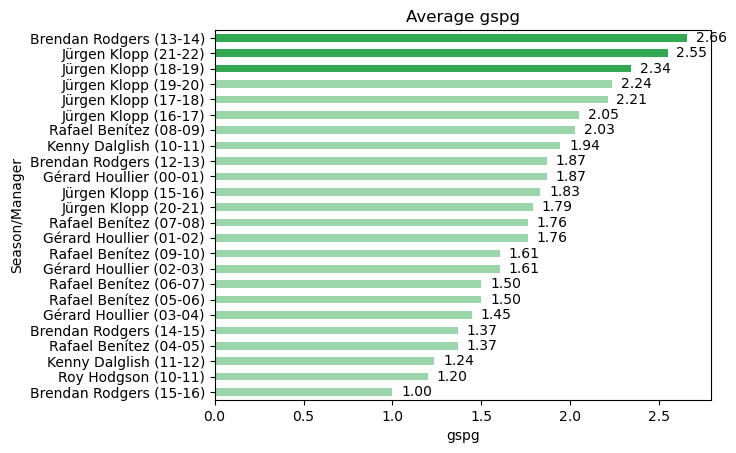

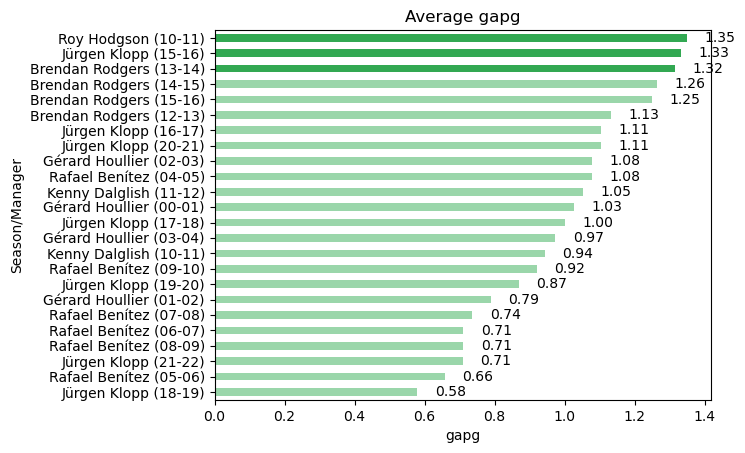

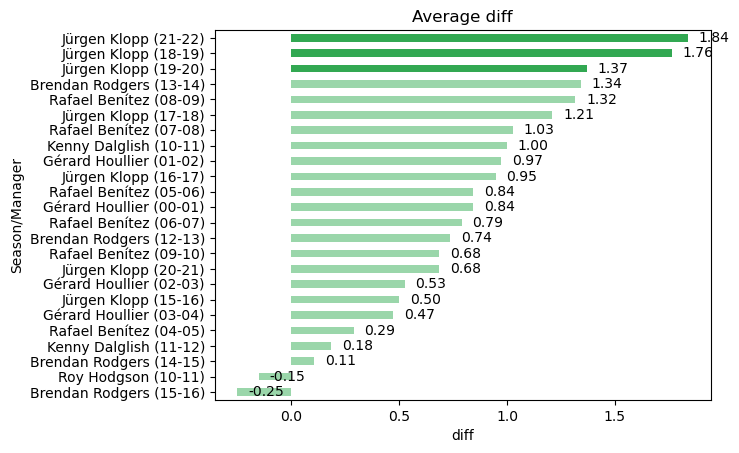

In [22]:
# now lets see goals overview seasonwise to see if our stats above are due to one season 'wonder'
goals_manager_season = df_compare_period.groupby(['Season', 'Manager']).agg (
                                                    gs = ('GS', 'sum'),
                                                    ga = ('GA', 'sum'),
                                                    cnt = ('GS', 'count') )
goals_manager_season['gspg'] = goals_manager_season['gs'] / goals_manager_season['cnt']
goals_manager_season['gapg'] = goals_manager_season['ga'] / goals_manager_season['cnt']
goals_manager_season = goals_manager_season.drop(columns=['gs', 'ga'])
goals_manager_season['diff']= goals_manager_season['gspg'] - goals_manager_season['gapg']
goals_manager_season['manager_season'] = goals_manager_season.apply(lambda row: f"{row.name[1]} ({row.name[0]})", axis=1)
goals_manager_season = goals_manager_season.sort_values(by='gspg', ascending=False)
goals_manager_season.reset_index(drop=True, inplace=True)
goals_manager_season = goals_manager_season[['manager_season', 'gspg', 'gapg', 'diff']]

listvar = goals_manager_season.columns[1:]

for i in listvar:

    goals_manager_season = goals_manager_season.sort_values(by=i, ascending=False)
    goals_manager_season.reset_index(drop=True, inplace=True)
    mask = goals_manager_season.index < 3
    color_map = ['#32a852' if top3 else '#9ad6aa' for top3 in mask]
    ax = goals_manager_season.plot.barh(y=i, x='manager_season', color=color_map, legend=False)
    plt.xlabel(i)
    plt.ylabel('Season/Manager')
    plt.title(f'Average {i}')
    plt.gca().invert_yaxis()
    for i, v in enumerate(goals_manager_season[i]):
        ax.text(v + 0.05, i, f'{v:.2f}', color='black', va='center')
    plt.show()


##### Summary:

<i>And we've got a surprise. It looks like Brendan Rodgers had the best scoring season <b>averaging at 2.66 goals scored per game</b>, however it looks like it was by the cost of higher goal
concession <b>1.32 goals conceced per game</b>. Klopp's consistency at the top goals scoring and the difference charts is impressive. What i find strange is to see Klopps at top 3 for
goals conceded chart <b>(2nd place with 1.33)</b>, however this can be explained with the fact that it was his first season at Liverpool and team was conceding nealy same
amount of goals in the previous season, <b>with 1.25 goals conceded per match</b> and in the beggining of the season<b>(1.26)</b>, when Rodgers was still in charge</i>
while the average goal concession is nearly the same during Klopp era and before that, but what strikes me here is that <b>Klopp's managed Liverpool managed to score nearly half goal more than the period before that</b>. This is huge indicator of a change! Also, another big thing we can see from the results below is that on average Klopp's team scores 1.19 goals more the opposition.

### Shot comparison section

In [23]:
#Creating new variables for shots

#total shots
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'SF'] = df_compare_period['HS']
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'SA'] = df_compare_period['AS']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'SF'] = df_compare_period['AS']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'SA'] = df_compare_period['HS']
#shots on target
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'SFT'] = df_compare_period['HST']
df_compare_period.loc[(df_compare_period['HomeTeam'] == 'Liverpool'), 'SAT'] = df_compare_period['AST']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'SFT'] = df_compare_period['AST']
df_compare_period.loc[(df_compare_period['AwayTeam'] == 'Liverpool'), 'SAT'] = df_compare_period['HST']

df_compare_period.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,D,L,Manager,before_after_era,GS,GA,SF,SA,SFT,SAT
2830,00-01,2000-08-19 00:00:00+00:00,Liverpool,Bradford,1,0,H,0.0,0.0,16.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,16.0,3.0,10.0,2.0
2834,00-01,2000-08-21 00:00:00+00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,17.0,...,NaN,1.0,Gérard Houllier,before Klopp,0.0,2.0,7.0,17.0,4.0,12.0
2850,00-01,2000-08-26 00:00:00+00:00,Southampton,Liverpool,3,3,D,0.0,1.0,14.0,...,1.0,NaN,Gérard Houllier,before Klopp,3.0,3.0,9.0,14.0,4.0,7.0
2862,00-01,2000-09-06 00:00:00+00:00,Liverpool,Aston Villa,3,1,H,3.0,0.0,11.0,...,NaN,NaN,Gérard Houllier,before Klopp,3.0,1.0,11.0,9.0,7.0,4.0
2867,00-01,2000-09-09 00:00:00+00:00,Liverpool,Man City,3,2,H,1.0,0.0,14.0,...,NaN,NaN,Gérard Houllier,before Klopp,3.0,2.0,14.0,9.0,8.0,7.0


In [24]:
result_shot = df_compare_period.groupby(['before_after_era']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            cnt=('SF', 'count') )
result_shot['sfpg'] = result_shot['sf'] / result_shot['cnt']
result_shot['sapg'] = result_shot['sa'] / result_shot['cnt']
result_shot['sftpg'] = result_shot['sft'] / result_shot['cnt']
result_shot['satpg'] = result_shot['sat'] / result_shot['cnt']
result_shot['shot_accuracy'] = result_shot['sft'] / result_shot['sf']
result_shot['shot_conversion'] = result_shot['gs'] / result_shot['sf']
result_shot = result_shot.drop(columns=['sf', 'sa', 'cnt', 'sft', 'sat', 'gs'])
result_shot

,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion
before_after_era,,,,,,
before Klopp,14.657439,8.989619,7.358131,4.323529,0.502007,0.113669
during Klopp,16.501992,8.490040,6.043825,3.051793,0.366248,0.129889


##### Summary:

<i>I was expecting alot more shots from our Klopp period as well as more shots on target on average based on the results and analysis on the previous sections. Our <b>Sh Acc for pre-Klopp era looks decent with 50% compared to only 36% Sh Acc under Klopp.</b></i> However, Klopp managed to improve the defense line of team, where we can observe that <b>the shots on target against Liverpool dropped by 1.25 per game.</b> Sh Con under Klopp is slightly better, but nothing drastic. All in all, the table above, makes me question my initial thoughts that Klopp revulitionized Liverpool's EPL performance and <b>maybe his success is due lowering quality of the direct oposition in EPL.</b>

In [25]:
#overview on shooting by manager
result_shot_manager = df_compare_period.groupby(['Manager']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            ga=('GA', 'sum'),
                                                            cnt=('SF', 'count') )
result_shot_manager['sfpg'] = result_shot_manager['sf'] / result_shot_manager['cnt']
result_shot_manager['sapg'] = result_shot_manager['sa'] / result_shot_manager['cnt']
result_shot_manager['sftpg'] = result_shot_manager['sft'] / result_shot_manager['cnt']
result_shot_manager['satpg'] = result_shot_manager['sat'] / result_shot_manager['cnt']
result_shot_manager['shot_accuracy'] = result_shot_manager['sft'] / result_shot_manager['sf']
result_shot_manager['shot_conversion'] = result_shot_manager['gs'] / result_shot_manager['sf']
result_shot_manager['shot_conversion_against'] = result_shot_manager['ga'] / result_shot_manager['sf']
result_shot_manager = result_shot_manager.drop(columns=['sf', 'sa', 'cnt', 'sft', 'sat', 'gs', 'ga'])
result_shot_manager

,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion,shot_conversion_against
Manager,,,,,,,
Brendan Rodgers,16.622951,11.180328,7.204918,4.393443,0.433432,0.114398,0.074458
Gérard Houllier,13.006579,9.078947,6.888158,4.506579,0.529590,0.128477,0.074355
Jürgen Klopp,16.501992,8.490040,6.043825,3.051793,0.366248,0.129889,0.057702
Kenny Dalglish,14.946429,10.160714,8.267857,5.410714,0.553166,0.097969,0.068100
Rafael Benítez,14.824561,7.311404,7.583333,3.815789,0.511538,0.109763,0.054142
Roy Hodgson,12.500000,10.800000,6.750000,5.250000,0.540000,0.096000,0.108000


<Figure size 1200x800 with 0 Axes>

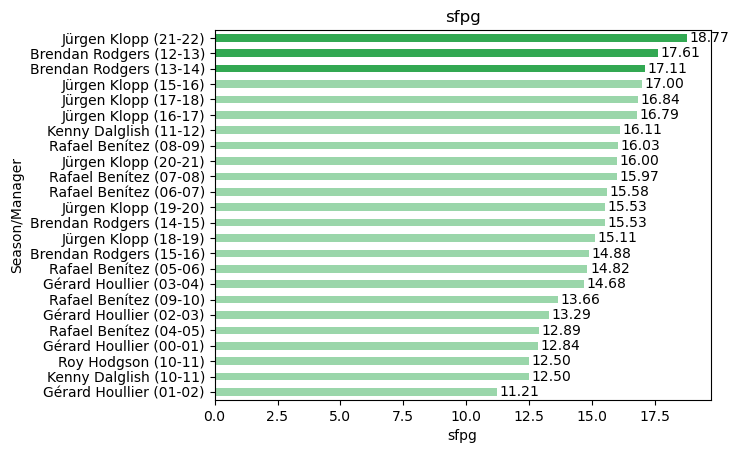

<Figure size 1200x800 with 0 Axes>

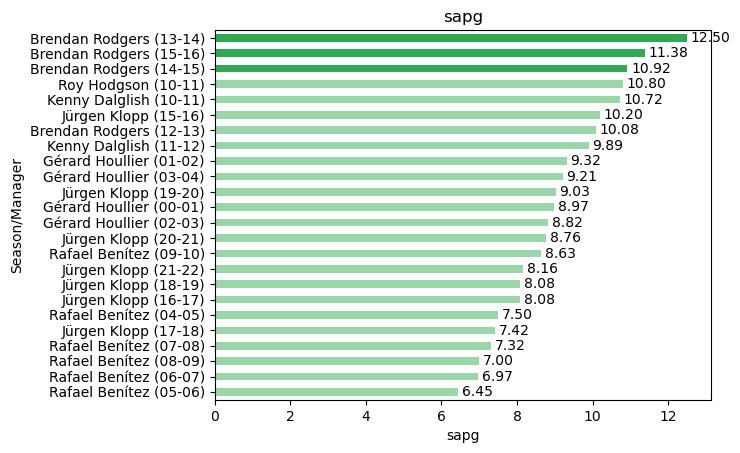

<Figure size 1200x800 with 0 Axes>

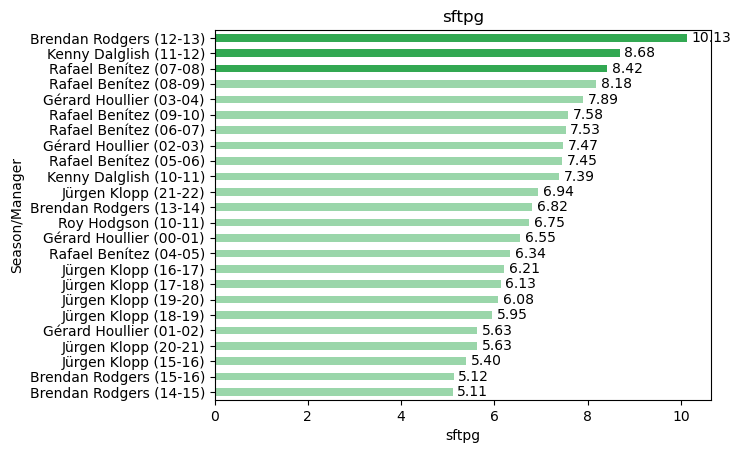

<Figure size 1200x800 with 0 Axes>

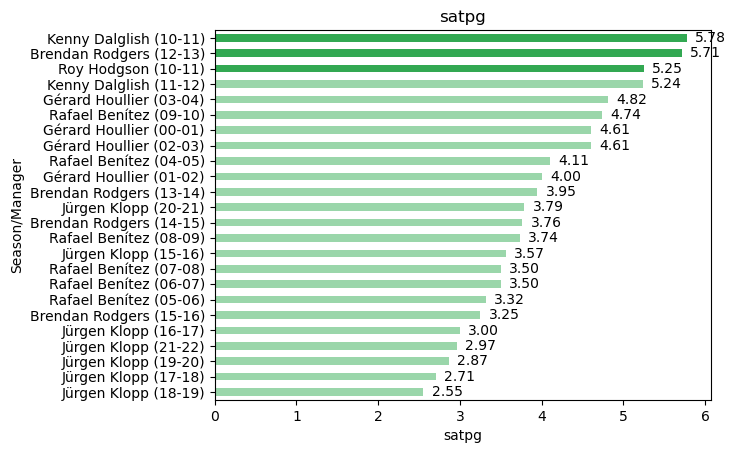

<Figure size 1200x800 with 0 Axes>

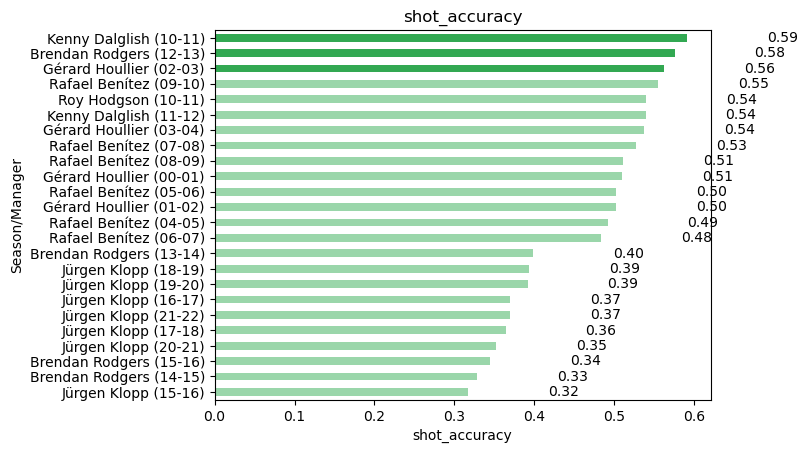

<Figure size 1200x800 with 0 Axes>

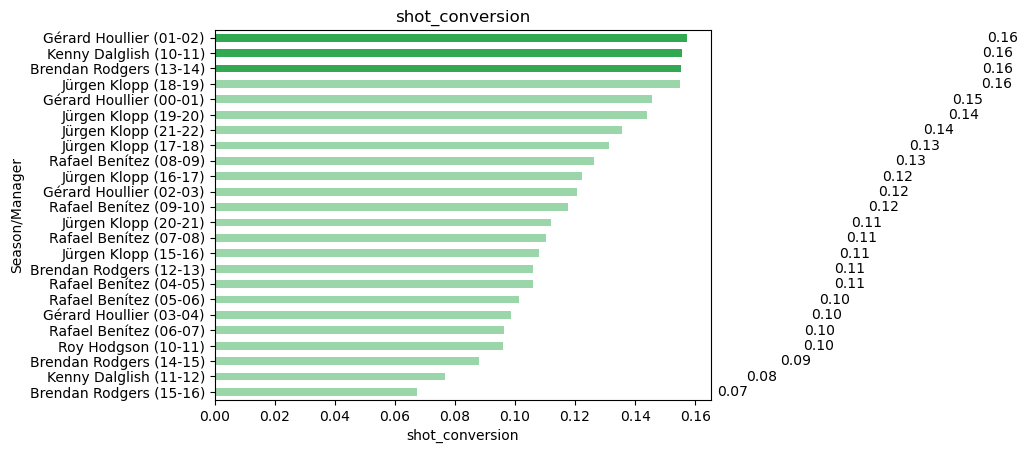

<Figure size 1200x800 with 0 Axes>

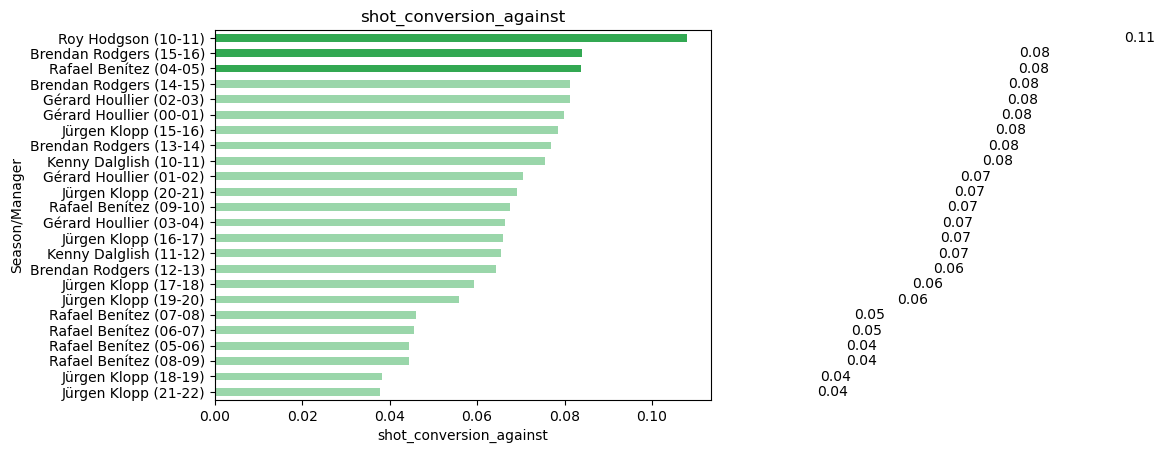

In [26]:
shot_manager_season = df_compare_period.groupby(['Season', 'Manager']).agg (
                                                    sf =('SF', 'sum'),
                                                    sa =('SA', 'sum'),
                                                    sft=('SFT', 'sum'),
                                                    sat=('SAT', 'sum'),
                                                    gs =('GS', 'sum'),
                                                    ga =('GA', 'sum'),
                                                    cnt=('SF', 'count') )                                                    
shot_manager_season['sfpg'] = shot_manager_season['sf'] /  shot_manager_season['cnt']
shot_manager_season['sapg'] = shot_manager_season['sa'] /  shot_manager_season['cnt']
shot_manager_season['sftpg'] =shot_manager_season['sft'] / shot_manager_season['cnt']
shot_manager_season['satpg'] =shot_manager_season['sat'] / shot_manager_season['cnt']
shot_manager_season['shot_accuracy'] = shot_manager_season['sft'] / shot_manager_season['sf']
shot_manager_season['shot_conversion'] = shot_manager_season['gs'] / shot_manager_season['sf']
shot_manager_season['shot_conversion_against'] = shot_manager_season['ga'] / shot_manager_season['sf']
shot_manager_season = shot_manager_season.drop(columns=['sf', 'sa', 'cnt', 'sft', 'sat', 'gs', 'ga'])

shot_manager_season['manager_season'] = shot_manager_season.apply(lambda row: f"{row.name[1]} ({row.name[0]})", axis=1)

listvar = shot_manager_season.columns[:-1]
listvar

for i in listvar:

    shot_manager_season = shot_manager_season.sort_values(by=i, ascending=False)
    shot_manager_season.reset_index(drop=True, inplace=True)
    mask = shot_manager_season.index < 3
    color_map = ['#32a852' if top3 else '#9ad6aa' for top3 in mask]
    plt.figure(figsize=(12, 8))
    ax = shot_manager_season.plot.barh(y=i, x='manager_season', color=color_map, legend=False)
    plt.xlabel(i)
    plt.ylabel('Season/Manager')
    plt.title(i)
    plt.gca().invert_yaxis()
    for i, v in enumerate(shot_manager_season[i]):
        ax.text(v + 0.1, i, f'{v:.2f}', color='black', va='center')
    plt.show()

##### Summary:

<i>Very interesting result, close values, which can be interpreted differently. I think <b>Klopp brings balance between ultra attacking Rodgers team, that also concedes more and ultra defensive Benitez side that creates nearly nothing, but in the same time is rock solid from the back.</b> Klopp is neither the best, when comparing the offensive part of the game, neither best when we are talking defense, however his stats are amongst the top in both regards of the football game. I believe this is the reason why he is so beloved and praised by the fans, he brings balance, consistency and predictability of a side who's most likely will grab the 3 points, which is the most important thing in the game.</i>

### Overall standings across seasons and derby performances

#### League standings overview

In [27]:
#creating virtual standings of EPL
all_sns = df['Season'].unique()
data = {'Season': [], 'Team': [], 'Pts': [], "GS": [], "GA": []}
for seas in all_sns:
    df1 = df[df['Season']==seas]
    all_teams = df1['HomeTeam'].unique()
    for team in all_teams:
        df2 = pd.concat([df1[df1['HomeTeam']== team], df1[df1['AwayTeam']== team]]).sort_index()
        
        df2.loc[(df2['HomeTeam'] == team)&(df2['FTR']=='H'), 'Pts'] = 3
        df2.loc[(df2['HomeTeam'] == team)&(df2['FTR']=='D'), 'Pts'] = 1
        df2.loc[(df2['AwayTeam'] == team)&(df2['FTR']=='A'), 'Pts'] = 3
        df2.loc[(df2['AwayTeam'] == team)&(df2['FTR']=='D'), 'Pts'] = 1
        
        df2.loc[(df2['HomeTeam'] == team), 'GS'] = df2['FTHG']
        df2.loc[(df2['AwayTeam'] == team), 'GS'] = df2['FTAG']
        df2.loc[(df2['HomeTeam'] == team), 'GA'] = df2['FTAG']
        df2.loc[(df2['AwayTeam'] == team), 'GA'] = df2['FTHG']

        sumpts = df2['Pts'].sum()
        sumgls = df2['GS'].sum()
        sumga = df2['GA'].sum()
        data['Season'].append(seas)
        data['Team'].append(team)
        data['Pts'].append(sumpts)
        data['GS'].append(sumgls)
        data['GA'].append(sumga)

In [28]:
#load the standings into dataframe and segmenting our data so we could compare performance vs top4 sides and bot4 sides
df3 = pd.DataFrame.from_dict(data)
df3['GD'] = df3['GS'] - df3['GA']
df3['Position'] = df3.sort_values(by=['Pts', 'GD'], 
                    ascending=[False, False]) \
                   .groupby('Season') \
                   .cumcount() + 1
df3 = df3[['Season', 'Position', 'Team', 'GS', 'GA', 'GD', 'Pts']]
df3 = df3.sort_values(['Season', 'Position']).reset_index(drop=True)
df3.loc[ (df3['Position']<=4) | (df3['Team'] == 'Liverpool'), 'vs_top4'] = 'TOP4'
df3.loc[ (df3['Position']>16) | (df3['Team'] == 'Liverpool'), 'vs_bot4'] = 'BOT4'
df3.to_csv("epl_standings.csv", index=False)
lfc_pos = df3[df3['Team']=='Liverpool']

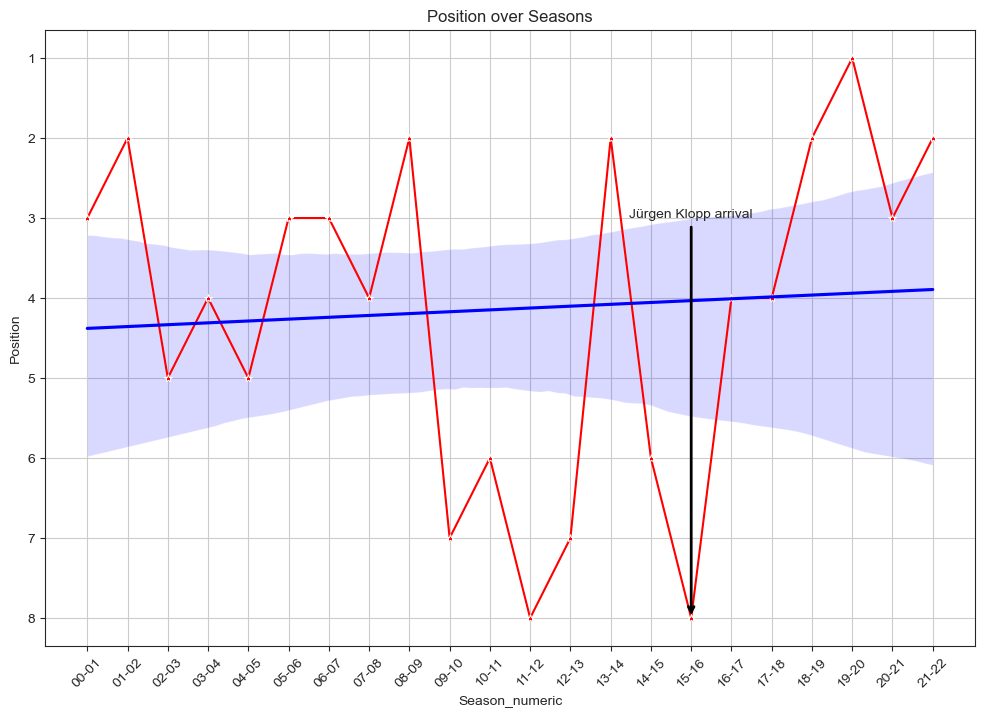

In [29]:
lfc_pos_copy = lfc_pos.copy()

lfc_pos_copy['Season_numeric'] = lfc_pos_copy['Season'].str.split('-').str[0].astype(int)

plt.figure(figsize=(12, 8))

sns.set_style('ticks')
sns.lineplot(x='Season_numeric', y='Position', data=lfc_pos_copy, marker='*', sort=False)

plt.xlabel('Season')
plt.ylabel('Position')
plt.title('Position over Seasons')
plt.xticks(rotation=45)

manager_arrivals = {'Jürgen Klopp': '15-16'}

for manager, arrival_season in manager_arrivals.items():
    season_data = lfc_pos_copy[lfc_pos_copy['Season'] == arrival_season]
    
    if not season_data.empty:
        # Use iloc[0] to access the first (and only) row
        pts = season_data['Position'].iloc[0]
        season_numeric = season_data['Season_numeric'].iloc[0]
        
        plt.annotate(f'{manager} arrival', 
                     xy=(season_numeric, pts), 
                     xytext=(season_numeric, pts - 5), 
                     ha='center',
                     arrowprops=dict(facecolor='yellow', edgecolor='black', linewidth=2, arrowstyle='->'))

# Set the line color to red
plt.gca().lines[0].set_color('red')

# Add trendline
sns.regplot(x='Season_numeric', y='Position', data=lfc_pos_copy, scatter=False, color='blue')

# Show the plot
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(ticks=lfc_pos_copy['Season_numeric'], labels=lfc_pos_copy['Season'], rotation=45)
plt.show()

##### Summary:

After the initial <b>8th place in his first season</b> Klopp managed to put Liverpool on <b>ascending trend and even led the team to a premier league title</b>. The team seems to be drove out of the <b>turbolent period staring at 09-10 season and lasted all the way to 15-16</b>, <u>when the team qualified for Champions League spot only one time in 7 seasons</u>. <u>And someone once said that u can't escape your football heritage</u>, but i guess <b>Klopp did</b>?

![Alt Text](https://pbs.twimg.com/media/FTYMrGfWAAEuzjf.jpg)

#### Performance vs top 4 sides

In [30]:
top4_vs_liverpool_list = []

all_seasons = df3['Season'].unique()

for season in all_seasons:
    top4_teams = df3.loc[(df3['Season'] == season) & (df3['vs_top4'] == 'TOP4'), 'Team'].unique()

    liverpool_matches = df_compare_period[df_compare_period['Season'] == season]
    
    for team in top4_teams:
        liverpool_vs_top4 = liverpool_matches[((liverpool_matches['HomeTeam'] == 'Liverpool') & (liverpool_matches['AwayTeam'] == team)) |
                                              ((liverpool_matches['AwayTeam'] == 'Liverpool') & (liverpool_matches['HomeTeam'] == team))]
        
        top4_vs_liverpool_list.append(liverpool_vs_top4)

top4 = pd.concat(top4_vs_liverpool_list, ignore_index=True)

top4.to_csv("top4.csv", index=False)
top4.head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,D,L,Manager,before_after_era,GS,GA,SF,SA,SFT,SAT
0,00-01,2000-12-17 00:00:00+00:00,Man United,Liverpool,0,1,A,0.0,1.0,6.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,9.0,6.0,4.0,4.0
1,00-01,2001-03-31 00:00:00+00:00,Liverpool,Man United,2,0,H,2.0,0.0,15.0,...,NaN,NaN,Gérard Houllier,before Klopp,2.0,0.0,15.0,9.0,6.0,3.0
2,00-01,2000-08-21 00:00:00+00:00,Arsenal,Liverpool,2,0,H,1.0,0.0,17.0,...,NaN,1.0,Gérard Houllier,before Klopp,0.0,2.0,7.0,17.0,4.0,12.0
3,00-01,2000-12-23 00:00:00+00:00,Liverpool,Arsenal,4,0,H,1.0,0.0,12.0,...,NaN,NaN,Gérard Houllier,before Klopp,4.0,0.0,12.0,12.0,6.0,6.0
4,00-01,2000-11-04 00:00:00+00:00,Leeds,Liverpool,4,3,H,1.0,2.0,10.0,...,NaN,1.0,Gérard Houllier,before Klopp,3.0,4.0,14.0,10.0,8.0,7.0
5,00-01,2001-04-13 00:00:00+00:00,Liverpool,Leeds,1,2,A,0.0,2.0,11.0,...,NaN,1.0,Gérard Houllier,before Klopp,1.0,2.0,11.0,9.0,5.0,3.0
6,01-02,2001-12-23 00:00:00+00:00,Liverpool,Arsenal,1,2,A,0.0,1.0,15.0,...,NaN,1.0,Gérard Houllier,before Klopp,1.0,2.0,15.0,11.0,2.0,3.0
7,01-02,2002-01-13 00:00:00+00:00,Arsenal,Liverpool,1,1,D,0.0,0.0,11.0,...,1.0,NaN,Gérard Houllier,before Klopp,1.0,1.0,5.0,11.0,2.0,4.0
8,01-02,2001-11-04 00:00:00+00:00,Liverpool,Man United,3,1,H,2.0,0.0,8.0,...,NaN,NaN,Gérard Houllier,before Klopp,3.0,1.0,8.0,10.0,5.0,3.0
9,01-02,2002-01-22 00:00:00+00:00,Man United,Liverpool,0,1,A,0.0,0.0,12.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,9.0,12.0,5.0,3.0


In [31]:
top4_perf = top4.groupby(['before_after_era']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            ga=('GA', 'sum'),
                                                            w=('W', 'sum'),
                                                            d=('D', 'sum'),
                                                            l=('L', 'sum'),
                                                            pts =('Pts', 'sum'),
                                                            cnt=('SF', 'count') )
top4_perf['ppg'] = top4_perf['pts'] / top4_perf['cnt']
top4_perf['gspg'] = top4_perf['gs'] / top4_perf['cnt']
top4_perf['gapg'] = top4_perf['ga'] / top4_perf['cnt']
top4_perf['sfpg'] = top4_perf['sf'] / top4_perf['cnt']
top4_perf['sapg'] = top4_perf['sa'] / top4_perf['cnt']
top4_perf['sftpg'] = top4_perf['sft'] / top4_perf['cnt']
top4_perf['satpg'] = top4_perf['sat'] / top4_perf['cnt']
top4_perf['shot_accuracy'] = top4_perf['sft'] / top4_perf['sf']
top4_perf['shot_conversion'] = top4_perf['gs'] / top4_perf['sf']
top4_perf['W%'] = top4_perf['w'] / top4_perf['cnt']
top4_perf['D%'] = top4_perf['d'] / top4_perf['cnt']
top4_perf['L%'] = top4_perf['l'] / top4_perf['cnt']
top4_perf = top4_perf.drop(columns=['sf', 'sa', 'sft', 'sat', 'gs', 'ga', 'w', 'd', 'l', 'pts'])
top4_perf

,cnt,ppg,gspg,gapg,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion,W%,D%,L%
before_after_era,,,,,,,,,,,,,
before Klopp,105,1.057143,1.190476,1.476190,12.180952,10.333333,5.866667,5.285714,0.481626,0.097733,0.276190,0.228571,0.495238
during Klopp,42,1.571429,1.571429,1.404762,12.857143,10.404762,4.785714,3.690476,0.372222,0.122222,0.380952,0.428571,0.190476


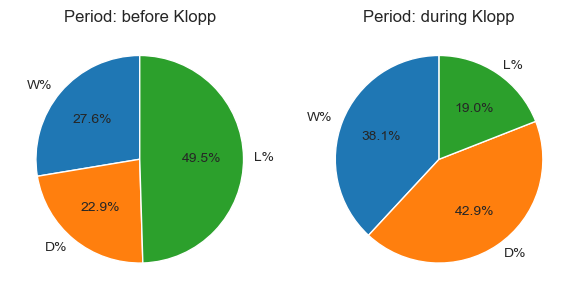

In [32]:
top4_pie = top4_perf[['W%', 'D%', 'L%']]
top4_pie

unique_values = top4_pie.index.unique()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for i, value in enumerate(unique_values):
    data = top4_pie.loc[value]
    
    # Pie chart for each group
    axes[i].pie(data[['W%', 'D%', 'L%']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Period: {value}')

plt.tight_layout()
plt.show()


##### Summary:

What strikes me here is <u>how well the team defends under Klopp</u> compared to previous period, <b>with above 30% decrese in losing matches against top opposition</b>. Klopp managed to won half point more on average against big 4. Also, another big impact seems to be the <u>shots on target against Liverpool</u>, <b>which dropped by 1.5 on avearge</b>. Topping that with <u>slightly increased Shot conversion</u> by <b>2.5%</b> and you can start seeing a clear picture of the magnificent work done by Klopp. But let's keep digging and compare him with every other manager worked for the club.

In [33]:
top4_perf_manager = top4.groupby(['Manager']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            ga=('GA', 'sum'),
                                                            w=('W', 'sum'),
                                                            d=('D', 'sum'),
                                                            l=('L', 'sum'),
                                                            pts=('Pts', 'sum'),
                                                            cnt=('SF', 'count') )
top4_perf_manager['ppg'] = top4_perf_manager['pts'] / top4_perf_manager['cnt']
top4_perf_manager['gspg'] = top4_perf_manager['gs'] / top4_perf_manager['cnt']
top4_perf_manager['gapg'] = top4_perf_manager['ga'] / top4_perf_manager['cnt']
top4_perf_manager['sfpg'] = top4_perf_manager['sf'] / top4_perf_manager['cnt']
top4_perf_manager['sapg'] = top4_perf_manager['sa'] / top4_perf_manager['cnt']
top4_perf_manager['sftpg'] = top4_perf_manager['sft'] / top4_perf_manager['cnt']
top4_perf_manager['satpg'] = top4_perf_manager['sat'] / top4_perf_manager['cnt']
top4_perf_manager['shot_accuracy'] = top4_perf_manager['sft'] / top4_perf_manager['sf']
top4_perf_manager['shot_conversion'] = top4_perf_manager['gs'] / top4_perf_manager['sf']
top4_perf_manager['W%'] = top4_perf_manager['w'] / top4_perf_manager['cnt']
top4_perf_manager['D%'] = top4_perf_manager['d'] / top4_perf_manager['cnt']
top4_perf_manager['L%'] = top4_perf_manager['l'] / top4_perf_manager['cnt']
top4_perf_manager = top4_perf_manager.drop(columns=['sf', 'sa', 'sft', 'sat', 'gs', 'ga', 'w', 'd', 'l', 'pts'])
top4_perf_manager

,cnt,ppg,gspg,gapg,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion,W%,D%,L%
Manager,,,,,,,,,,,,,
Brendan Rodgers,23,0.739130,1.304348,1.913043,14.782609,11.565217,6.347826,5.217391,0.429412,0.088235,0.130435,0.347826,0.521739
Gérard Houllier,26,1.307692,1.423077,1.384615,10.807692,10.576923,5.230769,5.192308,0.483986,0.131673,0.384615,0.153846,0.461538
Jürgen Klopp,42,1.571429,1.571429,1.404762,12.857143,10.404762,4.785714,3.690476,0.372222,0.122222,0.380952,0.428571,0.190476
Kenny Dalglish,12,1.333333,1.166667,1.250000,12.583333,11.833333,6.916667,6.333333,0.549669,0.092715,0.333333,0.333333,0.333333
Rafael Benítez,40,1.000000,0.975000,1.325000,11.775000,8.825000,5.800000,5.000000,0.492569,0.082803,0.275000,0.175000,0.550000
Roy Hodgson,4,1.000000,1.250000,1.750000,9.000000,12.250000,4.750000,6.000000,0.527778,0.138889,0.250000,0.250000,0.500000


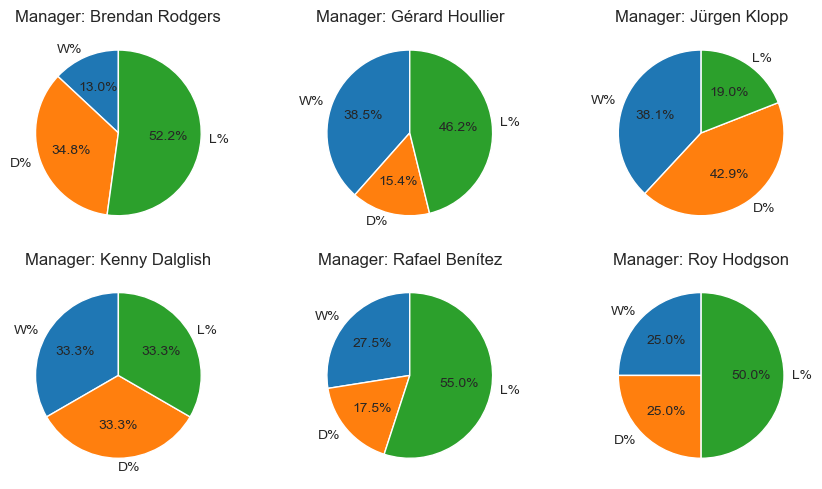

In [34]:
top4_pie = top4_perf_manager[['W%', 'D%', 'L%']]
top4_pie
unique_values = top4_pie.index.unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

for i, value in enumerate(unique_values):
    row, col = divmod(i, 3)  
    data = top4_pie.loc[value]
    
    axes[row, col].pie(data[['W%', 'D%', 'L%']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Manager: {value}')

plt.tight_layout()
plt.show()

##### Summary:

The only manager that comes close to Klopp comparing win ratio is Houllier, but the latters success comes at expense of losing nearly half of his derby matches. We can exclude Dalglish from the equation since he only has 12 derby games. Again, <u>the defense is what seperates Klopp from the rest of the pact</u>, where he's the only manager under whom Liverpool concedes <b>under 5 shots on target on average</b>.

#### Consistency against smaller teams

In [35]:
bot4_vs_liverpool_list = []

all_seasons = df3['Season'].unique()

for season in all_seasons:
    bot4_teams = df3.loc[(df3['Season'] == season) & (df3['vs_bot4'] == 'BOT4'), 'Team'].unique()

    liverpool_matches = df_compare_period[df_compare_period['Season'] == season]
    
    for team in bot4_teams:
        liverpool_vs_bot4 = liverpool_matches[((liverpool_matches['HomeTeam'] == 'Liverpool') & (liverpool_matches['AwayTeam'] == team)) |
                                              ((liverpool_matches['AwayTeam'] == 'Liverpool') & (liverpool_matches['HomeTeam'] == team))]
        
        bot4_vs_liverpool_list.append(liverpool_vs_bot4)

bot4 = pd.concat(bot4_vs_liverpool_list, ignore_index=True)

bot4.to_csv("bot4.csv", index=False)
bot4.head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,D,L,Manager,before_after_era,GS,GA,SF,SA,SFT,SAT
0,00-01,2000-10-15 00:00:00+00:00,Derby,Liverpool,0,4,A,0.0,1.0,6.0,...,NaN,NaN,Gérard Houllier,before Klopp,4.0,0.0,16.0,6.0,11.0,0.0
1,00-01,2001-03-18 00:00:00+00:00,Liverpool,Derby,1,1,D,0.0,1.0,18.0,...,1.0,NaN,Gérard Houllier,before Klopp,1.0,1.0,18.0,7.0,8.0,4.0
2,00-01,2000-09-09 00:00:00+00:00,Liverpool,Man City,3,2,H,1.0,0.0,14.0,...,NaN,NaN,Gérard Houllier,before Klopp,3.0,2.0,14.0,9.0,8.0,7.0
3,00-01,2001-01-31 00:00:00+00:00,Man City,Liverpool,1,1,D,0.0,1.0,4.0,...,1.0,NaN,Gérard Houllier,before Klopp,1.0,1.0,16.0,4.0,3.0,2.0
4,00-01,2000-11-12 00:00:00+00:00,Liverpool,Coventry,4,1,H,1.0,0.0,19.0,...,NaN,NaN,Gérard Houllier,before Klopp,4.0,1.0,19.0,10.0,13.0,5.0
5,00-01,2001-04-28 00:00:00+00:00,Coventry,Liverpool,0,2,A,0.0,0.0,11.0,...,NaN,NaN,Gérard Houllier,before Klopp,2.0,0.0,13.0,11.0,6.0,4.0
6,00-01,2000-08-19 00:00:00+00:00,Liverpool,Bradford,1,0,H,0.0,0.0,16.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,16.0,3.0,10.0,2.0
7,00-01,2001-05-01 00:00:00+00:00,Bradford,Liverpool,0,2,A,0.0,0.0,15.0,...,NaN,NaN,Gérard Houllier,before Klopp,2.0,0.0,11.0,15.0,10.0,4.0
8,01-02,2001-11-25 00:00:00+00:00,Liverpool,Sunderland,1,0,H,1.0,0.0,7.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,7.0,12.0,3.0,5.0
9,01-02,2002-04-13 00:00:00+00:00,Sunderland,Liverpool,0,1,A,0.0,0.0,10.0,...,NaN,NaN,Gérard Houllier,before Klopp,1.0,0.0,10.0,10.0,5.0,5.0


In [36]:
bot4_perf = bot4.groupby(['before_after_era']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            ga=('GA', 'sum'),
                                                            w=('W', 'sum'),
                                                            d=('D', 'sum'),
                                                            l=('L', 'sum'),
                                                            pts=('Pts', 'sum'),
                                                            cnt=('SF', 'count') )
bot4_perf['ppg'] = bot4_perf['pts'] / bot4_perf['cnt']
bot4_perf['gspg'] = bot4_perf['gs'] / bot4_perf['cnt']
bot4_perf['gapg'] = bot4_perf['ga'] / bot4_perf['cnt']
bot4_perf['sfpg'] = bot4_perf['sf'] / bot4_perf['cnt']
bot4_perf['sapg'] = bot4_perf['sa'] / bot4_perf['cnt']
bot4_perf['sftpg'] = bot4_perf['sft'] / bot4_perf['cnt']
bot4_perf['satpg'] = bot4_perf['sat'] / bot4_perf['cnt']
bot4_perf['shot_accuracy'] = bot4_perf['sft'] / bot4_perf['sf']
bot4_perf['shot_conversion'] = bot4_perf['gs'] / bot4_perf['sf']
bot4_perf['W%'] = bot4_perf['w'] / bot4_perf['cnt']
bot4_perf['D%'] = bot4_perf['d'] / bot4_perf['cnt']
bot4_perf['L%'] = bot4_perf['l'] / bot4_perf['cnt']
bot4_perf = bot4_perf.drop(columns=['sf', 'sa', 'sft', 'sat', 'gs', 'ga', 'w', 'd', 'l', 'pts'])
bot4_perf

,cnt,ppg,gspg,gapg,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion,W%,D%,L%
before_after_era,,,,,,,,,,,,,
before Klopp,122,2.295082,2.237705,0.713115,16.991803,8.221311,8.713115,3.778689,0.512783,0.131693,0.704918,0.180328,0.114754
during Klopp,53,2.358491,2.226415,0.660377,17.905660,7.566038,6.207547,2.622642,0.346681,0.124341,0.735849,0.150943,0.113208


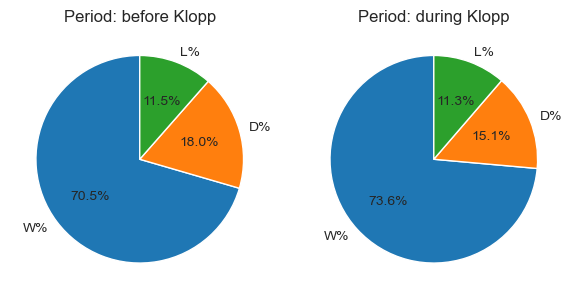

In [37]:
bot4_pie = bot4_perf[['W%', 'D%', 'L%']]
bot4_pie

unique_values = bot4_pie.index.unique()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for i, value in enumerate(unique_values):
    data = bot4_pie.loc[value]
    
    # Pie chart for each group
    axes[i].pie(data[['W%', 'D%', 'L%']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Period: {value}')

plt.tight_layout()
plt.show()

##### Summary:

There is almost no difference in stats comparing both periods, however there's slight increase in winning% at the draw% expense during Klopps tenure(3%). The other statistics seems to be close as well, so no big conclusion could be drawn here.

In [38]:
bot4_perf_manager = bot4.groupby(['Manager']).agg(
                                                            sf =('SF', 'sum'),
                                                            sa =('SA', 'sum'),
                                                            sft=('SFT', 'sum'),
                                                            sat=('SAT', 'sum'),
                                                            gs =('GS', 'sum'),
                                                            ga=('GA', 'sum'),
                                                            w=('W', 'sum'),
                                                            d=('D', 'sum'),
                                                            l=('L', 'sum'),
                                                            pts=('Pts', 'sum'),
                                                            cnt=('SF', 'count') )
bot4_perf_manager['ppg'] = bot4_perf_manager['pts'] / bot4_perf_manager['cnt']
bot4_perf_manager['gspg'] = bot4_perf_manager['gs'] / bot4_perf_manager['cnt']
bot4_perf_manager['gapg'] = bot4_perf_manager['ga'] / bot4_perf_manager['cnt']
bot4_perf_manager['sfpg'] = bot4_perf_manager['sf'] / bot4_perf_manager['cnt']
bot4_perf_manager['sapg'] = bot4_perf_manager['sa'] / bot4_perf_manager['cnt']
bot4_perf_manager['sftpg'] = bot4_perf_manager['sft'] / bot4_perf_manager['cnt']
bot4_perf_manager['satpg'] = bot4_perf_manager['sat'] / bot4_perf_manager['cnt']
bot4_perf_manager['shot_accuracy'] = bot4_perf_manager['sft'] / bot4_perf_manager['sf']
bot4_perf_manager['shot_conversion'] = bot4_perf_manager['gs'] / bot4_perf_manager['sf']
bot4_perf_manager['W%'] = bot4_perf_manager['w'] / bot4_perf_manager['cnt']
bot4_perf_manager['D%'] = bot4_perf_manager['d'] / bot4_perf_manager['cnt']
bot4_perf_manager['L%'] = bot4_perf_manager['l'] / bot4_perf_manager['cnt']
bot4_perf_manager = bot4_perf_manager.drop(columns=['sf', 'sa', 'sft', 'sat', 'gs', 'ga', 'w', 'd', 'l', 'pts'])
bot4_perf_manager

,cnt,ppg,gspg,gapg,sfpg,sapg,sftpg,satpg,shot_accuracy,shot_conversion,W%,D%,L%
Manager,,,,,,,,,,,,,
Brendan Rodgers,26,2.384615,2.269231,0.769231,19.730769,10.076923,8.653846,3.730769,0.438596,0.115010,0.730769,0.192308,0.076923
Gérard Houllier,32,2.468750,2.187500,0.468750,15.031250,7.812500,8.156250,3.562500,0.542620,0.145530,0.750000,0.218750,0.031250
Jürgen Klopp,53,2.358491,2.226415,0.660377,17.905660,7.566038,6.207547,2.622642,0.346681,0.124341,0.735849,0.150943,0.113208
Kenny Dalglish,12,1.833333,2.166667,1.333333,16.833333,10.000000,10.416667,5.166667,0.618812,0.128713,0.583333,0.083333,0.333333
Rafael Benítez,48,2.354167,2.375000,0.687500,17.000000,6.916667,8.708333,3.625000,0.512255,0.139706,0.729167,0.166667,0.104167
Roy Hodgson,4,1.000000,1.000000,0.750000,15.250000,9.750000,8.500000,3.500000,0.557377,0.065574,0.250000,0.250000,0.500000


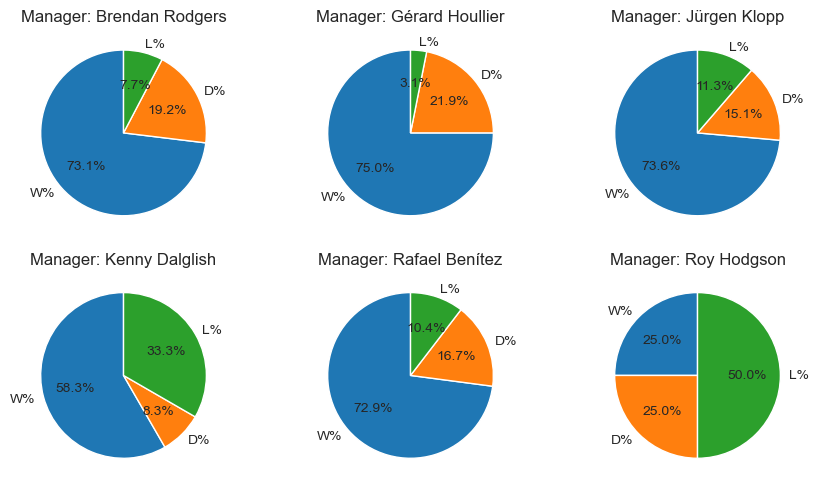

In [39]:
bot4_pie = bot4_perf_manager[['W%', 'D%', 'L%']]
bot4_pie
unique_values = bot4_pie.index.unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

for i, value in enumerate(unique_values):
    row, col = divmod(i, 3)  
    data = bot4_pie.loc[value]
    
    axes[row, col].pie(data[['W%', 'D%', 'L%']], labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Manager: {value}')

plt.tight_layout()
plt.show()

##### Summary:

Surprisingly, Klopp isn't the best manager, when it comes playing weaker opposition. <b>Infact there are 3 managers with less losing ratio than him</b>, which is something I would never expect and makes me think what would cause such an anomaly. Maybe <u>it's due to more european and domestic cup football the team is playing in the recent years, where Liverpool is always found in the latter stages of every competition</u>. This 11.3% losing rate is definately what stopped Liverpool winning more premier league titles under Klopp and it's a huge factor that needs to be worked on.

### Klopp vs Pep

In [48]:
#Pep was appointed as City manager at February 1st 2016, so lets create a dataset with the matches between Liverpool and City after that date
lfc_vs_mcfc = df_compare_period.loc[
    (((df_compare_period['HomeTeam'] == 'Liverpool') & (df_compare_period['AwayTeam'] == 'Man City')) |
     ((df_compare_period['AwayTeam'] == 'Liverpool') & (df_compare_period['HomeTeam'] == 'Man City'))) &
    (df_compare_period['DateTime'] >= '2016-02-01')
]
lfc_vs_mcfc.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,D,L,Manager,before_after_era,GS,GA,SF,SA,SFT,SAT
8798,15-16,2016-03-02 00:00:00+00:00,Liverpool,Man City,3,0,H,2.0,0.0,11.0,...,NaN,NaN,Jürgen Klopp,during Klopp,3.0,0.0,11.0,4.0,7.0,2.0
9088,16-17,2016-12-31 00:00:00+00:00,Liverpool,Man City,1,0,H,1.0,0.0,5.0,...,NaN,NaN,Jürgen Klopp,during Klopp,1.0,0.0,5.0,9.0,1.0,2.0
9184,16-17,2017-03-19 00:00:00+00:00,Man City,Liverpool,1,1,D,0.0,0.0,13.0,...,1.0,NaN,Jürgen Klopp,during Klopp,1.0,1.0,13.0,13.0,4.0,3.0
9318,17-18,2017-09-09 00:00:00+00:00,Man City,Liverpool,5,0,H,2.0,0.0,13.0,...,NaN,1.0,Jürgen Klopp,during Klopp,0.0,5.0,10.0,13.0,3.0,7.0
9512,17-18,2018-01-14 00:00:00+00:00,Liverpool,Man City,4,3,H,1.0,1.0,16.0,...,NaN,NaN,Jürgen Klopp,during Klopp,4.0,3.0,16.0,11.0,7.0,4.0


In [51]:
rivalry_data = lfc_vs_mcfc.groupby('Manager').agg(
    cnt = ('SF', 'count'),
    sf =('SF', 'sum'),
    sa =('SA', 'sum'),
    sft=('SFT', 'sum'),
    sat=('SAT', 'sum'),
    gs =('GS', 'sum'),
    ga=('GA', 'sum'),
    w=('W', 'sum'),
    d=('D', 'sum'),
    l=('L', 'sum'),
    pts=('Pts', 'sum')
)
rivalry_data

,cnt,sf,sa,sft,sat,gs,ga,w,d,l,pts
Manager,,,,,,,,,,,
Jürgen Klopp,13,122.0,135.0,51.0,48.0,19.0,25.0,4.0,5.0,4.0,17


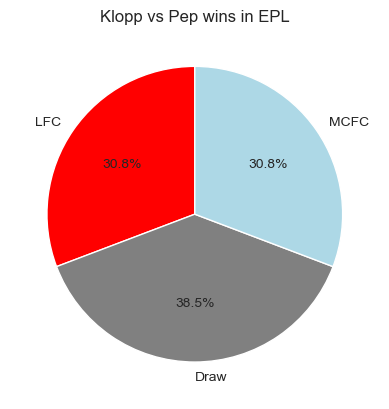

In [54]:
labels = ['LFC', 'Draw', 'MCFC']
sizes = [rivalry_data['w'].sum(), rivalry_data['d'].sum(), rivalry_data['l'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'lightblue'])
plt.title('Klopp vs Pep wins in EPL')
plt.show()

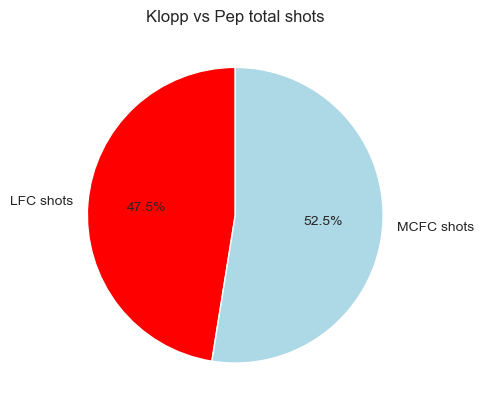

In [55]:
labels = ['LFC shots', 'MCFC shots']
sizes = [rivalry_data['sf'].sum(), rivalry_data['sa'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightblue'])
plt.title('Klopp vs Pep total shots')
plt.show()

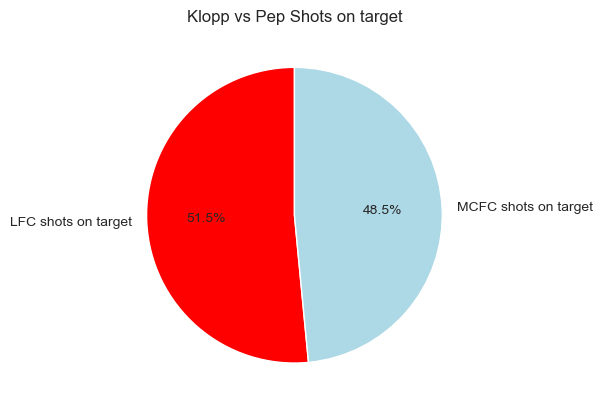

In [56]:
labels = ['LFC shots on target', 'MCFC shots on target']
sizes = [rivalry_data['sft'].sum(), rivalry_data['sat'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightblue'])
plt.title('Klopp vs Pep Shots on target')
plt.show()

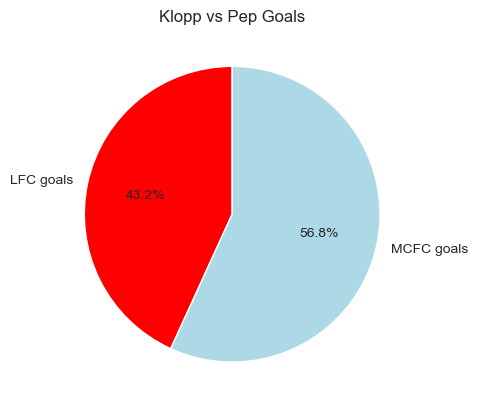

In [58]:
labels = ['LFC goals', 'MCFC goals']
sizes = [rivalry_data['gs'].sum(), rivalry_data['ga'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightblue'])
plt.title('Klopp vs Pep Goals')
plt.show()

In [59]:
rivalry_data['Sh Acc Liverpool'] = rivalry_data['sft'] / rivalry_data['sf']
rivalry_data['Sh Acc Man City'] = rivalry_data['sat'] / rivalry_data['sa']
rivalry_data['Sh Con Liverpool'] = rivalry_data['gs'] / rivalry_data['sf']
rivalry_data['Sh Con Man City'] = rivalry_data['ga'] / rivalry_data['sa']
rivalry_data

,cnt,sf,sa,sft,sat,gs,ga,w,d,l,pts,Sh Acc Liverpool,Sh Acc Man City,Sh Con Liverpool,Sh Con Man City
Manager,,,,,,,,,,,,,,,
Jürgen Klopp,13,122.0,135.0,51.0,48.0,19.0,25.0,4.0,5.0,4.0,17,0.418033,0.355556,0.155738,0.185185


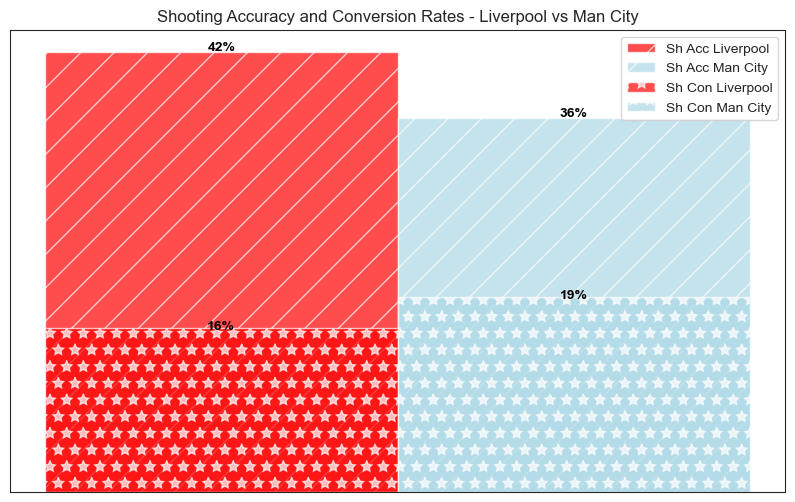

In [82]:
columns_to_plot = ['Sh Acc Liverpool', 'Sh Acc Man City', 'Sh Con Liverpool', 'Sh Con Man City']

colors = ['red', 'lightblue', 'red', 'lightblue']
markers = ['/', '/', '*', '*']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.20
bar_positions = range(len(rivalry_data))

ax.bar(bar_positions, rivalry_data['Sh Acc Liverpool'], width=bar_width, color='red', label='Sh Acc Liverpool', alpha=0.7, hatch='/')
ax.bar([pos + bar_width for pos in bar_positions], rivalry_data['Sh Acc Man City'], width=bar_width, color='lightblue', label='Sh Acc Man City', alpha=0.7, hatch='/')

ax.bar(bar_positions, rivalry_data['Sh Con Liverpool'], width=bar_width, color='red', label='Sh Con Liverpool', alpha=0.7, hatch='*')
ax.bar([pos + bar_width for pos in bar_positions], rivalry_data['Sh Con Man City'], width=bar_width, color='lightblue', label='Sh Con Man City', alpha=0.7, hatch='*')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height * 1.01, f'{height:.0%}', ha='center', va='center', color='black', fontweight='bold')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('Shooting Accuracy and Conversion Rates - Liverpool vs Man City')
plt.legend()

plt.show()

##### Summary:

These two seemed to be <b>dead even</b>, when they clash on pitch with little variation, but i guess this is due to their different style of play. <u>While City tend to have more overall shots</u>, which indicates they are controlling the ball more and therefore their players having more opportunities to shoot, Liverpool on the other hand looks more dangerous with more shots on target and overall Sh Acc%, due to the <b>direct playstyle of Klopp</b>. City scored more goals in the derby and have better conversion rate%, which indicates for a superior quality of their players on the pitch. Overall Klopp did great job in this rivalry holding its ground against the best and most valuable team in the modern football.

## Conclusion:

After analyzing several features and comparing Klopp to other Liverpool's managers as well as opposition teams/managers we can list few points that follows:
- Klopp's Liverpool winning rate is drastically improved with more than 10% <b>(63.8% for his overall tenure)</b> compared to previous period/managers
- Liverpool losing rate declined with more than 10% as well and <b>went down to 13.5%</b>
- Not only his winning rate is better, he is consistently better thru different EPL campaign topping the charts for that measurement
- Overall <b>goal scoring on average went up</b>, while <b>goal conceding went down</b>, which indicates how well Klopp works in both phases of the game
- Shot conversion% slightly increased (by 1.25%), <b>but the biggest change I can see is the shots on target that the team concedes under Klopp, which diminished drastically with 1.5 shots conceded less on average</b>
- Klopp's side is a regular Champions League participant, which is another positive we can mention, and of course <b>he won the Premier League</b>, which none other Liverpool's manager did in the new milennial
- His performance against the elite of enligh football is great <b>losing only 19% of the matches against Top 4 sides</b> and dominating, when reviewing overall goal scoring/conceding and shooting, which comes to show us that Klopp not only winning the points, but <u>also outplaying the opposition</u>.
- Klopp vs Pep rivarly is dead even statswise, but for me this is a Klopp's win due to the spending power of Man City
- The only stats I found that works against Klopp was the performance against Bot 4 EPL clubs and I think this is a key factor of not winning more silverware. However, I think the problem is solveable by adding more depth to the first team and therefore competing on multiple fronts simultaniously

<b><i>All in all, I can conclude that Klopp really revitalized Liverpool FC in every manner of the football game, bringing silverware home, playing attractive style and in the same time being cautios from the back. Very mature and drive side, which knows what and how to do, with the only bitter note of not adding 1-2 more EPL titles under the belt due to wasting precious points against lesser opposition</i></b>.